In [11]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random as rnd

df = pd.read_csv("data.csv", sep=';', encoding = "ISO-8859-1")

In [12]:
#Functions
def Min (a, b):
    if a < b:
        return a
    else:
        return b
    
def Max (a, b):
    if a > b:
        return a
    else:
        return b

def Abs (a, b):
    if a > b:
        return a - b
    else:
        return b - a

In [13]:
#Task1
def DrawPoints(coord1, coord2, First, Last):
    #plt.figure()
    plt.grid(True)
    X=df[coord1]
    Y=df[coord2]
    i=First
    #print (len(df))
    #while i<=100:
    #while i<=len(df):
    while i <= Last:
        plt.scatter(df[coord1][i], df[coord2][i], color="blue")
        i+=1
    plt.show()

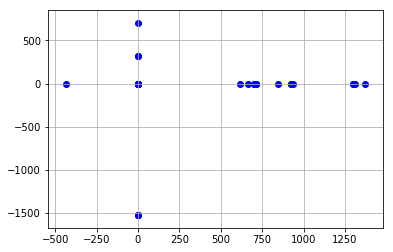

done


In [14]:
#DrawPoint('X13', 'X14')
DrawPoints('X13', 'X14', 1, 100)#just testing
print ("done")

In [15]:
#Task2
def PrintParams(ProbArray, TrueArray, NeedPrint):
    i=0
    tn = 0
    tp = 0
    fn = 0
    fp = 0
    un = 0
    #print()
    while i < Min(len(ProbArray), len(TrueArray)):
        if ProbArray[i] >= 0.5:
            if TrueArray[i] == "F":
                tn+=1
                if NeedPrint != 0: 
                    print (ProbArray[i], "\t", TrueArray[i], "tn")#true negative
            if TrueArray[i] == "G":
                fp+=1
                if NeedPrint != 0: 
                    print (ProbArray[i], "\t", TrueArray[i], "  fp")#false positive
        else:
            if TrueArray[i] == "F":
                fn+=1
                if NeedPrint != 0: 
                    print (ProbArray[i], "\t", TrueArray[i], "  fn")#false negative
            if TrueArray[i] == "G":
                tp+=1
                if NeedPrint != 0: 
                    print (ProbArray[i], "\t", TrueArray[i], "  tp")#true positive
        if TrueArray[i] == "U":
            un+=1
            if NeedPrint != 0: 
                print (ProbArray[i], "\t", TrueArray[i], "  un")#unable to classify
        i+=1
    print("Summary:")
    print ("true positive:", tp)
    print ("true negative:", tn)
    print ("false positive:", fp)
    print ("false negative:", fn)
    print ("unable to classify:", un)
    

In [16]:
print("From p1_Fraud:")
PrintParams(df['p1_Fraud'][:100], df['CLASS'][:100], 1)
print("\nFrom p5_Fraud:")
PrintParams(df['p5_Fraud'], df['CLASS'], 0)

From p1_Fraud:
0.2608 	 G   tp
0.1233 	 G   tp
0.0433 	 G   tp
0.28 	 G   tp
0.3117 	 G   tp
0.1758 	 G   tp
0.345 	 F   fn
0.1242 	 G   tp
0.0642 	 G   tp
0.0758 	 G   tp
0.0733 	 G   tp
0.275 	 G   tp
0.0542 	 G   tp
0.0717 	 G   tp
0.085 	 G   tp
0.306 	 F   fn
0.163 	 F   fn
0.391 	 F   fn
0.01 	 G   tp
0.0333 	 G   tp
0.473 	 G   tp
0.3675 	 F   fn
0.575 	 G   fp
0.641 	 G   fp
0.641 	 G   fp
0.065 	 G   tp
0.0642 	 G   tp
0.185 	 F   fn
0.614 	 G   fp
0.0242 	 G   tp
0.075 	 G   tp
0.36 	 G   tp
0.3442 	 G   tp
0.32 	 G   tp
0.277 	 F   fn
0.135 	 G   tp
0.0308 	 G   tp
0.0317 	 G   tp
0.0992 	 F   fn
0.456 	 F   fn
0.1683 	 G   tp
0.0092 	 G   tp
0.0542 	 G   tp
0.659 	 F tn
0.2917 	 G   tp
0.0683 	 G   tp
0.686 	 F tn
0.1617 	 G   tp
0.2825 	 G   tp
0.695 	 F tn
0.38 	 G   tp
0.0492 	 G   tp
0.395 	 G   tp
0.649 	 G   fp
0.474 	 F   fn
0.21 	 G   tp
0.691 	 F tn
0.29 	 G   tp
0.065 	 G   tp
0.0717 	 G   tp
0.695 	 F tn
0.2967 	 G   tp
0.22 	 F   fn
0.678 	 G   fp
0.603 	 G   fp

In [17]:
def CalcFP(ProbArray, TrueArray, Border):#false positive probability (fraud: P>=Border)
    All=Min(len(ProbArray), len(TrueArray))
    FPC=0
    i=1
    while i < All:
        if ProbArray[i] >= Border and TrueArray[i] == "G":
            FPC+=1
        i+=1
    return FPC/All

def CalcFN(ProbArray, TrueArray, Border):#false positive probability (fraud: P>=Border)
    All=Min(len(ProbArray), len(TrueArray))
    FNC=0
    i=1
    while i < All:
        if ProbArray[i] < Border and TrueArray[i] == "F":
            FNC+=1
        i+=1
    return FNC/All

def CalcTP(ProbArray, TrueArray, Border):#false positive probability (fraud: P>=Border)
    All=Min(len(ProbArray), len(TrueArray))
    TPC=0
    i=1
    while i < All:
        if ProbArray[i] < Border and TrueArray[i] == "G":
            TPC+=1
        i+=1
    return TPC/All

def CalcTN(ProbArray, TrueArray, Border):#false positive probability (fraud: P>=Border)
    All=Min(len(ProbArray), len(TrueArray))
    TNC=0
    i=1
    while i < All:
        if ProbArray[i] >= Border and TrueArray[i] == "F":
            TNC+=1
        i+=1
    return TNC/All

def CalcBorder (ProbArray, TrueArray, MaxFP):#calculate Border (false positive <= MaxFP)
    Border=0
    Incr=0.1
    while CalcFP(ProbArray, TrueArray, Border) > MaxFP:
        if Border+Incr == 1:
            Incr/=10
        Border+=Incr
    return Border

def CalcRecall (ProbArray, TrueArray, Border):#calculate recall
    TP = CalcTP(ProbArray, TrueArray, Border)
    FN = CalcFN(ProbArray, TrueArray, Border)
    Recall = TP/(TP+FN)
    return Recall

def CalcPrecision (ProbArray, TrueArray, Border):#calculate precision
    TP = CalcTP(ProbArray, TrueArray, Border)
    FP = CalcFP(ProbArray, TrueArray, Border)
    Precision = TP/(TP+FP)
    return Precision    

In [18]:
print(CalcFP(df['p1_Fraud'][:100], df['CLASS'][:100], 0.5))

0.14


In [19]:
print(CalcFP(df['p1_Fraud'][:100], df['CLASS'][:100], 0))
print(CalcBorder(df['p1_Fraud'][:100], df['CLASS'][:100], 0.2))#false positive <= 0.2

0.77
0.4


In [20]:
print("False positive: ", CalcFP(df['p1_Fraud'][:100], df['CLASS'][:100], 0.5))
print("False negative: ", CalcFN(df['p1_Fraud'][:100], df['CLASS'][:100], 0.5))
print("True positive: ", CalcTP(df['p1_Fraud'][:100], df['CLASS'][:100], 0.5))
print("Recall: ", CalcRecall(df['p1_Fraud'][:100], df['CLASS'][:100], 0.5))
print("Precision: ", CalcPrecision(df['p1_Fraud'][:100], df['CLASS'][:100], 0.5))

False positive:  0.14
False negative:  0.13
True positive:  0.63
Recall:  0.8289473684210527
Precision:  0.8181818181818181


In [21]:
#Task3
"""
def CalcTPR (ProbArray, TrueArray, Border):
    TP=CalcTP(ProbArray, TrueArray, Border)
    FN=CalcFN(ProbArray, TrueArray, Border)
    #return TP/(TP+FN)#ERROR: division by zero
    if TP+FN!=0:
        TPR=TP/(TP+FN)
        return TPR
    else:
        #print (TP, "<TPR>", FN, " ", Border)
        return 1

def CalcFPR (ProbArray, TrueArray, Border):
    FP=CalcFP(ProbArray, TrueArray, Border)
    TN=CalcTN(ProbArray, TrueArray, Border)
    #return FP/(FP+TN)#ERROR: division by zero
    if FP+TN!=0:
        FPR=FP/(FP+TN)
        return FPR
    else:
        #print (FP, "<FPR>", TN, " ", Border)
        return 1
"""
def CalcTPR (ProbArray, TrueArray, Border):
    All=Min(len(ProbArray), len(TrueArray))
    TP=CalcTP(ProbArray, TrueArray, Border)*All
    FN=CalcFN(ProbArray, TrueArray, Border)*All
    #return TP/(TP+FN)#ERROR: division by zero
    if TP+FN!=0:
        TPR=TP/(TP+FN)
        return TPR
    else:
        #print (TP, "<TPR>", FN, " ", Border)
        return 0

def CalcFPR (ProbArray, TrueArray, Border):
    FP=CalcFP(ProbArray, TrueArray, Border)*All
    TN=CalcTN(ProbArray, TrueArray, Border)*All
    #return FP/(FP+TN)#ERROR: division by zero
    if FP+TN!=0:
        FPR=FP/(FP+TN)
        return FPR
    else:
        #print (FP, "<FPR>", TN, " ", Border)
        return 0

#ATTENTION! ERRORS!
def ROC_And_Gini (ProbArray, TrueArray, Step, Print):#Draw ROC (Print=1) and calc Gini
    plt.figure()
    plt.grid(True)
    Gini=0
    X=[]
    Y=[]
    MX=0
    MY=0
    Counter=0
    Border=1
    while Border >= 0:
        #print (CalcFP(Prob, Real, First, Last, Border), " ", CalcTP(Prob, Real, First, Last, Border))
        #X.insert(Counter, CalcFP(Prob, Real, First, Last, Border))
        #Y.insert(Counter, CalcTP(Prob, Real, First, Last, Border))
        X.insert(Counter, CalcFPR(ProbArray, TrueArray, Border))
        Y.insert(Counter, CalcTPR(ProbArray, TrueArray, Border))
        MX=Max(MX, X[Counter])
        MY=Max(MY, Y[Counter])
        Gini=Max(Gini, Abs(X[Counter], Y[Counter]))
        #print(Border)
        #if Border <= 0.2:
            #print(X[Counter]," ", Y[Counter])
        if Counter > 0 and Print == 1:
            plt.plot([X[Counter-1], X[Counter]], [Y[Counter-1], Y[Counter]], 'b-')#ROC
        Counter+=1
        if Border > 0 and Border - Step < 0:
            Border = 0
        else:
            Border-=Step
    
    if Print == 1:
        plt.plot([0, MX], [0, MY], 'g:')
        plt.show()
    return Gini

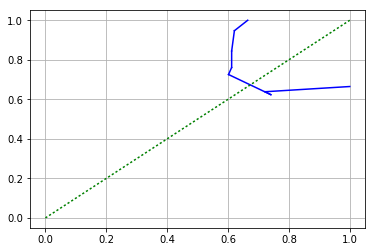

Gini =  0.3352914595571622


In [22]:
print ("Gini = ", ROC_And_Gini(df['p1_Fraud'], df['CLASS'], 0.1, 1));#Wrong graph

In [31]:
#Task4

def GroupProb1 (Arr1, Arr2, Arr3):
    Group=[]
    i=0
    Length=Min(Min(len(Arr1), len(Arr2)), len(Arr3))
    while i < Length:
        Group.insert(i, (Arr1[i]+Arr2[i]+Arr3[i])/3)
        i+=1
    return Group

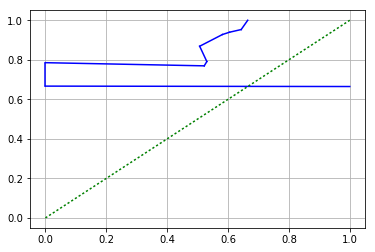

0.7853065582522278

In [33]:
Group=GroupProb1 (df['p1_Fraud'], df['p2_Fraud'], df['p3_Fraud'])
ROC_And_Gini(Group, df['CLASS'], 0.1, 1)#Wrong graph

In [24]:
#Task5
def GroupProb1 (Arr1, Arr2, Arr3, A, B, C):
    Group=[]
    i=0
    Length=Min(Min(len(Arr1), len(Arr2)), len(Arr3))
    while i < Length:
        Group.insert(i, (Arr1[i]+Arr2[i]+Arr3[i])/3)
        i+=1
    return Group

In [25]:
#Task6

In [26]:
#Task7
def CallCenter (ProbArray, TrueArray, Border):
    Delta=0
    RND=0
    i=0
    while i < Min(len(ProbArray), len(TrueArray)):
        if ProbArray[i] >= Border:
            RND=rnd.random()
            #print (RND)
            if RND <= 0.9:
                Delta+=400
                if TrueArray[i] == "G":
                    Delta-=2000
        i+=1

    if Delta < 0:
        print ("Bank lost", -1*Delta, "credits")
    else:
        print ("Bank recieved", Delta, "credits")

In [27]:
CallCenter (df['p1_Fraud'], df['CLASS'], 0.75)
CallCenter (df['p1_Fraud'], df['CLASS'], 0.7)
CallCenter (df['p1_Fraud'], df['CLASS'], 0.65)
CallCenter (df['p2_Fraud'], df['CLASS'], 0.7)
CallCenter (df['p3_Fraud'], df['CLASS'], 0.7)
CallCenter (df['p4_Fraud'], df['CLASS'], 0.7)
CallCenter (df['p5_Fraud'], df['CLASS'], 0.7)

Bank recieved 0 credits
Bank lost 2800 credits
Bank lost 7222400 credits
Bank lost 7378000 credits
Bank recieved 2483600 credits
Bank lost 694400 credits
Bank lost 9131200 credits


In [28]:
#Task8